#Import Libraries and Datasets

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
newspaper_data = pd.read_csv('/content/NewspaperData.csv')

In [3]:
newspaper_data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


#Data Understanding

In [4]:
newspaper_data.dtypes

Newspaper     object
daily        float64
sunday       float64
dtype: object

In [5]:
newspaper_data.isna().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [6]:
newspaper_data.shape

(34, 3)

#Data Preparation

In [7]:
newspaper_data.drop('Newspaper', axis=1, inplace=True)

In [8]:
newspaper_data.head()

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093


In [9]:
X = newspaper_data['daily']
y = newspaper_data['sunday']

#Model Building

Linear regression can be achived using 2 libaries:

1. Statsmodel - Ordinary least square[OLS]

2. Sklearn - LinearRegression()

**Using statsmodels for linear regression**

Model Building | Model training

In ols method Model Building and Model training done simultenously

In [10]:
import statsmodels.formula.api as sfa

In [11]:
linear_model = sfa.ols(formula = 'sunday~daily',data = newspaper_data).fit()
linear_model

In [12]:
linear_model.params

Intercept    13.835630
daily         1.339715
dtype: float64

#Model Testing

In [13]:
test_data = pd.DataFrame({'daily':[200,300,400]})
test_data

,daily
0,200
1,300
2,400


In [14]:
linear_model.predict(test_data)

0    281.778581
1    415.750057
2    549.721533
dtype: float64

In [15]:
y_pred = linear_model.predict(X)
y_pred.head()

0    538.939509
1    706.442705
2    490.275710
3    333.431284
4    734.307432
dtype: float64

In [16]:
y.head()

0    488.506
1    798.298
2    235.084
3    299.451
4    559.093
Name: sunday, dtype: float64

#Model Evaluation

In [17]:
error = y-y_pred
error.head()

0    -50.433509
1     91.855295
2   -255.191710
3    -33.980284
4   -175.214432
dtype: float64

#Assumption Check

##Check for linearity

<function matplotlib.pyplot.show(*args, **kw)>

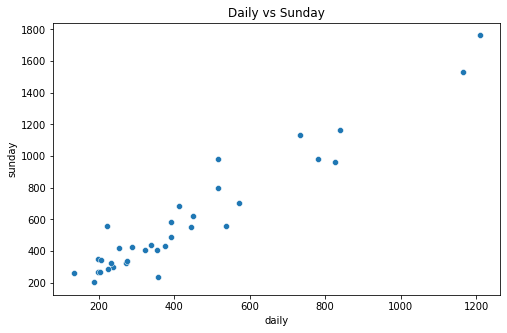

In [18]:
plt.figure(figsize = (8,5))
sns.scatterplot(x= 'daily', y ='sunday',data = newspaper_data)
plt.title('Daily vs Sunday')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 576x360 with 0 Axes>

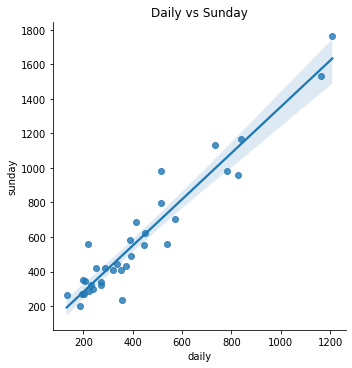

In [19]:
plt.figure(figsize = (8,5))
sns.lmplot(x= 'daily', y ='sunday',data = newspaper_data)
plt.title('Daily vs Sunday')
plt.show

##Check whether the data is normally distributed

<function matplotlib.pyplot.show(*args, **kw)>

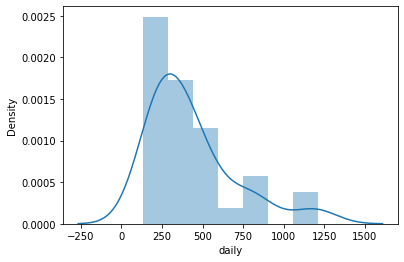

In [20]:
sns.distplot(a =newspaper_data['daily'])
plt.show

In [21]:
newspaper_data['daily'].skew() # As the skewness is more than 1 the data is not normally distributed. Thus the assumption is failed.

1.5321591323040094

##Homoscedasticity check


**Note:** 

It can be only preformed post model training.

For Homoscedasticity check all you **input feature** should be in a **similar scale**.

Homoscedasticity test is passed when we have similar variance across 0.

It is a plot between Input vs Error (Error= y-y_pred)

<function matplotlib.pyplot.show(*args, **kw)>

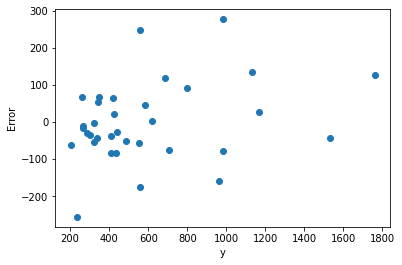

In [22]:
plt.scatter(x = y,y = error)  # we cannot use sns because input features are from different dataframe.
plt.xlabel('y')
plt.ylabel('Error')
plt.show

##Zero residual mean across the fitted line

**Note**: 

It can be only preformed post model training.

It's a plot between Actual Output Vs Predicted Output

<function matplotlib.pyplot.show(*args, **kw)>

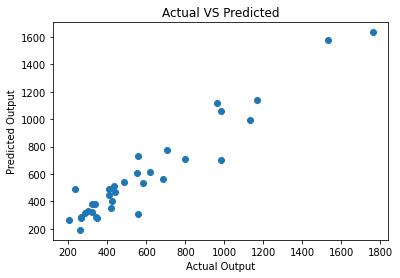

In [23]:
plt.scatter(x = y,y = y_pred)  # we canot use sns because input features are from different dataframe.
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.title('Actual VS Predicted')
plt.show

##No Multicollinearity

Here we cannot check multicolinearity because of only one input feature

##No AutoRegression

This test is passed as there is no time series data involved in input feature.

#Model Deployment

In [24]:
from pickle import dump

In [25]:
dump(linear_model,open('model.pkl','wb'))

In [26]:
from pickle import load

In [27]:
loaded_model = load(open('model.pkl','rb'))

End